# Portfolio Tracking

In [1]:
import sys
sys.path.append('../Functions/')

from PortfolioTrackingOEX import PortfolioTracking

tracking = PortfolioTracking()

### PCA visiualization

<module 'matplotlib.pyplot' from 'C:\\Users\\ajzwa\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

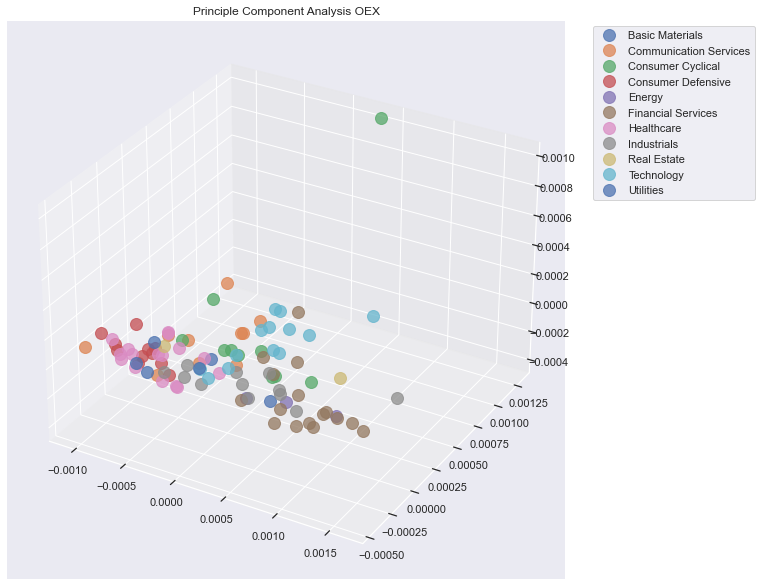

In [2]:
tracking.pca_plot()

### Weights from PCA

In [3]:
tracking.pca_tracking_weights()

ticker   weights
XOM     XOM.N  0.009513
GD       GD.N  0.000492
ABT     ABT.N  0.010891
COST  COST.OQ  0.017469
CVX     CVX.N  0.014651
...       ...       ...
GILD  GILD.OQ  0.018399
EXC    EXC.OQ  0.002541
MCD     MCD.N  0.005927
AAPL  AAPL.OQ  0.001338
LLY     LLY.N  0.015480

[99 rows x 2 columns]

In [4]:
import pandas as pd
weights = pd.DataFrame(tracking.pca_tracking_weights())
weights.to_excel("../../Data/weights_complete_oex.xlsx")

### Returns Tracking Portfolio & Index
#### Cummulative Returns

In [5]:
tracking.cum_returns()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 26624: invalid start byte

### tracking error
![image](../../graphs/tracking_error.png)

In [8]:
top_20 = tracking.top_n()
top_20.to_excel("../../data/results/top_20_explained_variance.xlsx")

In [9]:
from sklearn import linear_model
import pandas as pd
import statsmodels.api as sm
import numpy as np

df=pd.read_csv("../../Data/price/constituents_oex_cleansed.csv",index_col=0)
df_oex=pd.read_csv("../../Data/price/price_oexYF.csv",index_col=0)

df_constituents = df.pct_change().dropna()
df_oex=df_oex.pct_change().dropna()

est = sm.OLS(df_oex, df_constituents[top_20.index])
est = est.fit()

est.summary()

C:\Users\ajzwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\ajzwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 26624: invalid start byte

In [ ]:
insig_assets = est.pvalues[est.pvalues > 0.05]
neg_params = est.params[est.params < 0]

drop_assets = insig_assets+neg_params

In [ ]:
assets = top_20.drop(drop_assets.index)
est = sm.OLS(df_oex, df_constituents[assets.index])
est = est.fit()

est.summary()

In [ ]:
insig_assets = est.pvalues[est.pvalues > 0.05]
neg_params = est.params[est.params < 0]

drop_assets = insig_assets+neg_params

In [ ]:
assets = assets.drop(drop_assets.index)
est = sm.OLS(df_oex, df_constituents[assets.index])
est = est.fit()

results_summary = est.summary()


# Note that tables is a list. The table at index 1 is the "core" table. Additionally, read_html puts dfs in a list, so we want index 0
results_as_html = results_summary.tables[1].as_html()
df = pd.read_html(results_as_html, header=0, index_col=0)[0]
df.to_csv("../../Data/Weigths_OEX_PCA.csv")

In [ ]:
assets=df.index

In [ ]:
df

In [ ]:
import pandas as pd
import eikon as ek
ek.set_app_key('29d80d9e81ce436e8b4c8b98bde5d17d9fccbfd2') 

df_imv = pd.DataFrame()
for ticker in df.index:
    ticker = ticker.split(".",1)
    ticker = (ticker[0]+"ATMIV.U")
    df1,e = ek.get_data(ticker,
                   ['TR.30DAYATTHEMONEYIMPLIEDVOLATILITYINDEXFORPUTOPTIONS.Date',
                   'TR.30DAYATTHEMONEYIMPLIEDVOLATILITYINDEXFORPUTOPTIONS'],
                    {'SDate':'20190101','EDate':'20220101','Frq':'D'})
    df_imv[ticker] = df1['30 Day At-The-Money Implied Volatility Index for Put Options']
    df_imv["Date"] = df1['Date']

df_imv = df_imv.set_index('Date')

In [ ]:
df_imv.columns[df_imv.isnull().any()]

IBM & SBUX has some missing values for the At The Money Implied Volatility 30 days. Both will be discarded from the previous regression


In [ ]:
assets = assets.drop(['IBM','SBUX'])
est = sm.OLS(df_oex, df_constituents[assets])
est = est.fit()

results_summary = est.summary()


# Note that tables is a list. The table at index 1 is the "core" table. Additionally, read_html puts dfs in a list, so we want index 0
results_as_html = results_summary.tables[1].as_html()
df = pd.read_html(results_as_html, header=0, index_col=0)[0]
df.to_csv("../../Data/Weigths_OEX_PCA.csv")
df

In [ ]:
import pandas as pd
import eikon as ek
ek.set_app_key('29d80d9e81ce436e8b4c8b98bde5d17d9fccbfd2') 

df_imv = pd.DataFrame()
for ticker in df.index:
    ticker = ticker.split(".",1)
    ticker = (ticker[0]+"ATMIV.U")
    df1,e = ek.get_data(ticker,
                   ['TR.30DAYATTHEMONEYIMPLIEDVOLATILITYINDEXFORPUTOPTIONS.Date',
                   'TR.30DAYATTHEMONEYIMPLIEDVOLATILITYINDEXFORPUTOPTIONS'],
                    {'SDate':'20190101','EDate':'20220101','Frq':'D'})
    df_imv[ticker] = df1['30 Day At-The-Money Implied Volatility Index for Put Options']
    df_imv["Date"] = df1['Date']

df_imv = df_imv.set_index('Date')

In [ ]:
df_imv.columns[df_imv.isnull().any()]

In [ ]:
df_imv

In [ ]:
df_imv.to_csv("../../Data/ATM_IV_Constituents.csv")

### Get the AT IMV for OEX

In [ ]:
import pandas as pd
import eikon as ek
ek.set_app_key('29d80d9e81ce436e8b4c8b98bde5d17d9fccbfd2') 

df_imv_oex = pd.DataFrame()

df1,e = ek.get_data('OEXATMIV.U',
               ['TR.30DAYATTHEMONEYIMPLIEDVOLATILITYINDEXFORPUTOPTIONS.Date',
               'TR.30DAYATTHEMONEYIMPLIEDVOLATILITYINDEXFORPUTOPTIONS'],
                {'SDate':'20190101','EDate':'20220101','Frq':'D'})
df_imv_oex['OEX'] = df1['30 Day At-The-Money Implied Volatility Index for Put Options']
df_imv_oex["Date"] = df1['Date']

df_imv_oex = df_imv_oex.set_index('Date')
df_imv_oex

In [ ]:
df_imv_oex.to_csv('../../Data/at_imv_oex.csv')

In [ ]:
df_imv.index.difference(df_imv_oex.index)